<a href="https://colab.research.google.com/github/ThuyHaLE/Problem1_Prediction/blob/main/Linear_Regressions_using_Gradient_Descent_(vectorization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import random
from google.colab import files

#Linear Regression, vectorization $X = [1, x_1, x_2, x_3, ..., x_n]$

##Data Preparation

In [ ]:
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
def prepare_data_vec(file_name_dataset, normalization = 0) :
  data = np . genfromtxt ( file_name_dataset , delimiter =',', skip_header =1)
  X = data[: ,:3]
  y = data[: ,3:]
  N = len(X)
  normed_X = X
  if normalization == 1: #Min-max normalization for each feature
    normed_X = min_max_scaling_1feature(X)
  elif normalization == 2: #Min-max normalization for all features
    normed_X = min_max_scaling_allfeatures (X)
  elif normalization == 3: #Mean normalization for all features
    normed_X = mean_normalization (X)
  X_ = np.c_[np.ones((N, 1)),normed_X] #Non-normalization
  return X_ , y

Min-max normalization: $X_{new} = \frac{X_{old}−X_{min}}{X_{max}−X_{min}}$

In [ ]:
def min_max_scaling_1feature(X):
  normed_X = np.zeros(X.shape)
  for i in range(X.shape[1]):
    normed_X[:,i:i+1] = (X[:,i:i+1]-min(X[:,i:i+1]))/(max(X[:,i:i+1])-min(X[:,i:i+1]))
  return normed_X

def min_max_scaling_allfeatures (X) :
  normed_X = (X - np.min(X))/(np.max(X)-np.min(X))
  return normed_X

Mean normalization: $X_{new} = \frac{X_{old}−X_{mean}}{X_{max}−X_{min}}$

In [ ]:
def  mean_normalization (X) :
  normed_X  = (X - np.mean(X)) / (np.max(X)- np.min(X))
  return normed_X

In [ ]:
X_, y_ = prepare_data_vec('advertising.csv', normalization = 0)
X_1,y_1 = prepare_data_vec('advertising.csv', normalization = 1)
X_2,y_2 = prepare_data_vec('advertising.csv', normalization = 2)
X_3,y_3 = prepare_data_vec('advertising.csv', normalization = 3)

##Linear regression for $y = x_0b + x_1w_1 + x_2w_2 + x_3w_3$ using Gradient Descent



**Mean Absolute Error**

$L_{MAE} = |y_{hat} - y|$

$|x| = \sqrt{x^2} = (x^2)^{\frac{1}{2}}$

$((x^2)^{\frac{1}{2}})' = \frac{x}{|x|}$

$((u^2)^{\frac{1}{2}})' = \frac{u}{|u|}u'$

**Gradient of Mean Squared Error**

$(L_{MAE})' = \frac{y_{hat} - y}{|y_{hat} - y|}(y_{hat}−y)'$

In [ ]:
def loss_MAE(yi_hat,yi):
  loss = abs(yi_hat-yi)
  d_loss = (yi_hat-yi) / abs(yi_hat-yi)
  return loss, d_loss

**Mean Squared Error**

$L_{MSE}=\frac{1}{2}(y_{hat}−y)^2$

$(u^2)' = 2.u.u'$

**Gradient of Mean Squared Error**

$(L_{MSE})'=(y_{hat}−y)(y_{hat}−y)'$

In [ ]:
def loss_MSE(yi_hat,yi):
  loss = 1/2 *(yi_hat - yi)**2
  d_loss = (yi_hat - yi)
  return loss, d_loss

**Huberloss**

$L(h_{hat} - y) =
\left\{
\begin{array}{cc}
\frac{1}{2}(h_{hat} - y)^2 for |h_{hat} - y|\leq\delta\\
\delta|h_{hat} - y|- \frac{1}{2}\delta^2 otherwise
\end{array}
\right. $

**Gradient of Huberloss**

$L^{'}(h_{hat} - y) =
\left\{
\begin{array}{cc}
(h_{hat} - y)(y_{hat}−y)' for |h_{hat} - y|\leq\delta\\
\frac{\delta(y_{hat}-y)}{|y_{hat}-y|}(y_{hat}−y)' otherwise
\end{array}
\right. $

In [ ]:
def loss_Huber(yi_hat,yi,delta):
  loss = []
  d_loss = []
  for id in range(len(yi)):
    if abs(yi_hat[id]-yi[id]) < delta:
      loss.append(1/2*(yi_hat[id] - yi[id])*(yi_hat[id] - yi[id]))
      d_loss.append(yi_hat[id]-yi[id])
    else:
      loss.append((delta*abs(yi_hat[id]-yi[id]) - 0.5*delta*delta))
      d_loss.append(delta*(yi_hat[id]-yi[id])/abs(yi_hat[id]-yi[id]))
  return loss, d_loss

###Stochastic_gradient_descent()

In [ ]:
def stochastic_gradient_descent ( X_b , y , n_epochs =50 , loss_func ='MSE', learning_rate =0.00001, delta=0.5) :
  thetas = np.random.randn(4 , 1)
  thetas_path = [thetas]
  losses = []
  N = len(y)
  for epoch in range ( n_epochs ) :
    for i in range(N) :
      random_index = np.random.randint(N) # select random number in N
      xi = X_b[random_index : random_index +1]
      yi = y[random_index : random_index +1]
      yi_hat = xi.dot(thetas) # Compute output
      if loss_func == 'MSE':
        loss, d_loss = loss_MSE(yi_hat,yi)
      elif loss_func == 'MAE':
        loss, d_loss = loss_MAE(yi_hat,yi)
      elif loss_func == 'Huber':
        loss, d_loss = loss_Huber(yi_hat,yi,delta)
      xi_grad = xi.T.dot(d_loss) # Compute gradient
      thetas = thetas - (learning_rate*xi_grad) # update theta
      thetas_path.append(thetas) # logging
      losses.append(loss[0][0])
  return thetas_path , losses

###Mini_batch_gradient_descent()

In [ ]:
def mini_batch_gradient_descent ( X_b , y , n_epochs =50 ,loss_func = 'MSE', minibatch_size =20 , learning_rate =0.01, delta=0.5) :
  thetas = np.random.randn(4 , 1)
  thetas_path = [ thetas ]
  losses = []
  N = len(y)
  for epoch in range (n_epochs) :
    shuffled_indices = np. random.permutation (N)
    X_b_shuffled = X_b [ shuffled_indices ]
    y_shuffled = y [ shuffled_indices ]
    for i in range (0 , N , minibatch_size ):
      xi = X_b_shuffled [ i : i + minibatch_size ]
      yi = y_shuffled [ i: i + minibatch_size ]
      yi_hat = xi.dot(thetas)
      if loss_func == 'MSE':
        loss, d_loss = loss_MSE(yi_hat,yi)
      elif loss_func == 'MAE':
        loss, d_loss = loss_MAE(yi_hat,yi)
      elif loss_func == 'Huber':
        loss, d_loss = loss_Huber(yi_hat,yi,delta)
      gradients = xi.T.dot(d_loss)
      thetas = thetas - learning_rate*(gradients/minibatch_size)
      thetas_path.append (thetas)
      loss_mean = np.sum(loss) / minibatch_size
      losses.append (loss_mean)
  return thetas_path , losses

###Batch_gradient_descent()

In [ ]:
def batch_gradient_descent ( X_b , y , n_epochs =100 ,loss_func = 'MSE', learning_rate =0.01,delta=0.5) :
  thetas = np. random . randn (4 , 1)
  thetas_path = [ thetas ]
  losses = []
  N = len(y)
  for i in range (n_epochs) :
    xi = X_b
    yi = y
    yi_hat = xi.dot(thetas)
    if loss_func == 'MSE':
      loss, d_loss = loss_MSE(yi_hat,yi)
    elif loss_func == 'MAE':
      loss, d_loss = loss_MAE(yi_hat,yi)
    elif loss_func == 'Huber':
      loss, d_loss = loss_Huber(yi_hat,yi,delta)
    gradients = xi.T.dot(d_loss)
    thetas = thetas - learning_rate * (gradients/N)
    thetas_path.append(thetas)
    mean_loss = np.sum(loss)/N
    losses.append (mean_loss)
  return thetas_path , losses

##MSE loss

best loss is 4.625125165343292e-09 with index is 5775 and best theta is [[ 4.98593473]
 [15.9656296 ]
 [ 5.13267341]
 [ 0.23497586]]


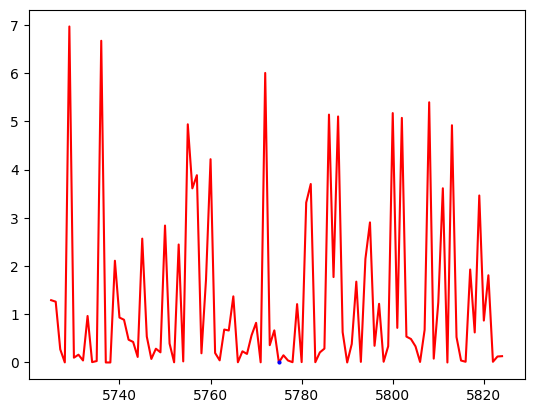

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_1, y_1 , n_epochs =50,loss_func = 'MSE' ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 6.062478677185749e-09 with index is 991 and best theta is [[9.21718197e+00]
 [1.16336956e+01]
 [1.04970423e-02]
 [1.57796878e+00]]


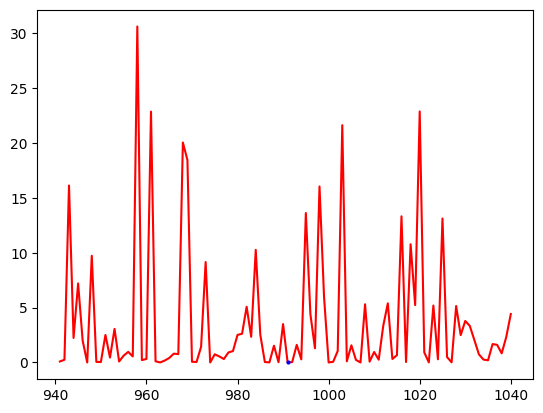

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_2, y_2 ,loss_func = 'MSE', n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 7.865282158724531e-11 with index is 2761 and best theta is [[11.58890949]
 [15.07485339]
 [-0.83550649]
 [ 1.44607446]]


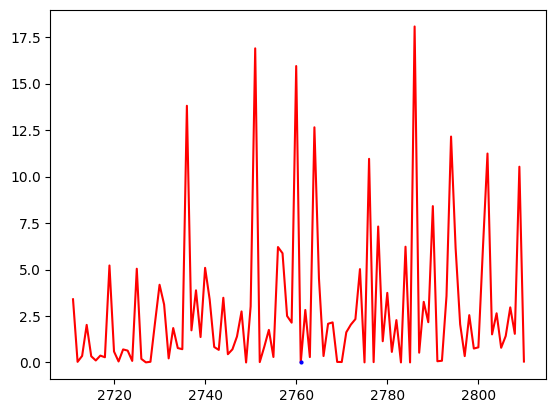

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_3, y_3 , loss_func = 'MSE', n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 1.9178169097605384 with index is 498 and best theta is [[8.23363412]
 [7.29228217]
 [6.35659906]
 [1.86243403]]


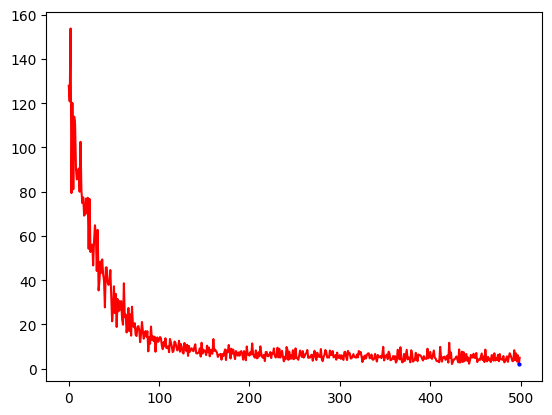

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_1, y_1 , loss_func = 'MSE',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 1.1104623916022014 with index is 496 and best theta is [[11.11444646]
 [ 8.74500397]
 [ 0.09929365]
 [-0.57871199]]


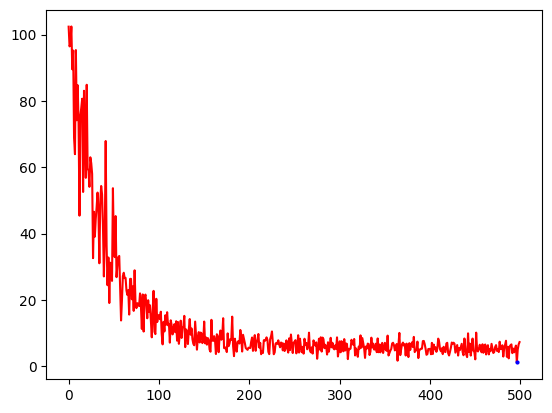

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_2, y_2 , loss_func = 'MSE',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 2.1398138306843872 with index is 350 and best theta is [[12.48298007]
 [ 7.65279304]
 [-0.72941634]
 [-2.94234147]]


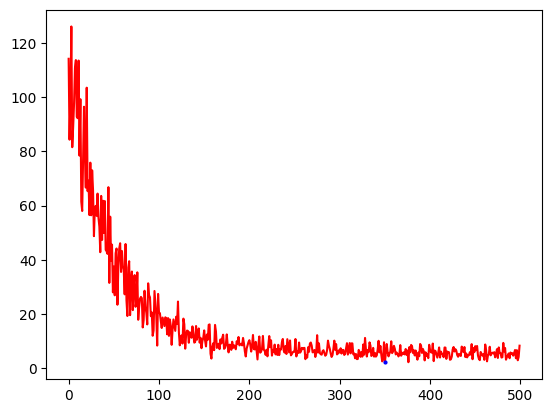

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_3, y_3 , n_epochs =50,loss_func = 'MSE' ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

100
best loss is 12.71315461455165 with index is 99 and best theta is [[ 9.00298524]
 [ 4.58929413]
 [-0.45052314]
 [-2.69316177]]


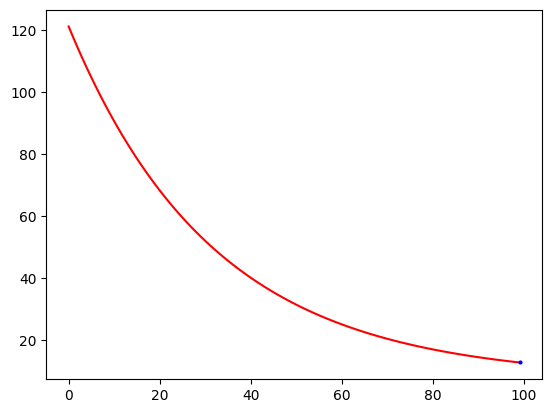

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_1 , y_1 , n_epochs =100 ,loss_func = 'MSE', learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

100
best loss is 17.476316778268608 with index is 99 and best theta is [[ 9.00298524]
 [ 4.58929413]
 [-0.45052314]
 [-2.69316177]]


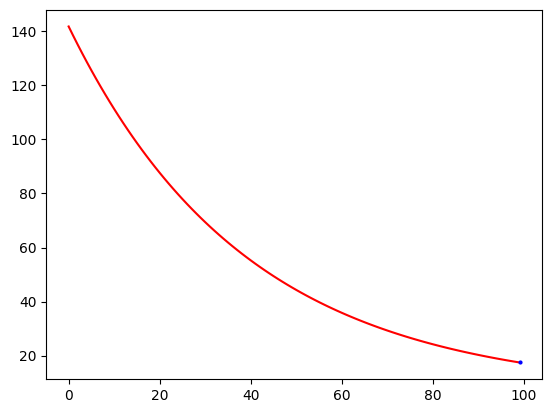

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_2 , y_2 , n_epochs =100,loss_func = 'MSE' , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

100
best loss is 20.15700195567573 with index is 99 and best theta is [[ 9.00298524]
 [ 4.58929413]
 [-0.45052314]
 [-2.69316177]]


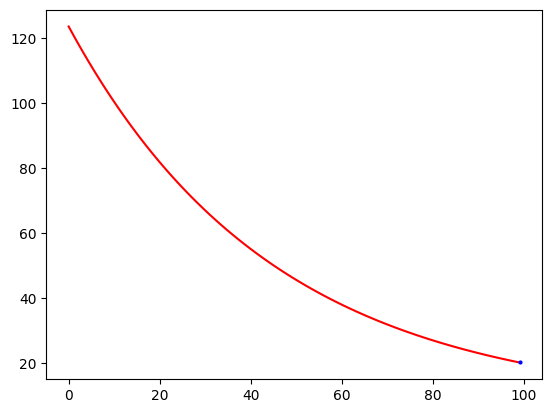

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_3 , y_3 , loss_func = 'MSE', n_epochs =100 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

##Huber loss

best loss is 2.0348208093288456e-11 with index is 8674 and best theta is [[ 7.7413781 ]
 [10.72310667]
 [ 3.69962222]
 [ 2.24383886]]


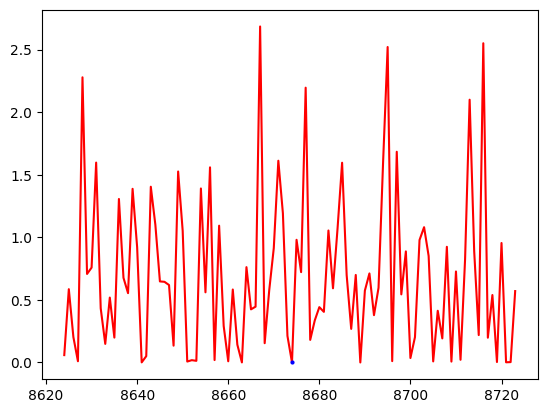

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_1, y_1 , loss_func = 'Huber',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 1.3382879817145445e-08 with index is 8949 and best theta is [[ 9.19542842]
 [11.36640626]
 [ 2.57295089]
 [ 0.86438444]]


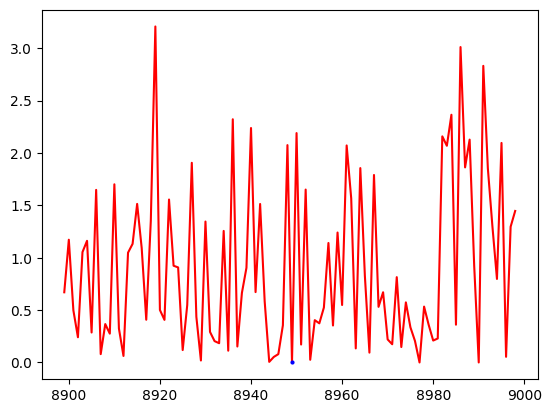

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_2, y_2 , loss_func = 'Huber',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 4.0595100791188217e-08 with index is 6979 and best theta is [[12.23324026]
 [ 9.24361832]
 [-1.77643125]
 [-1.46873577]]


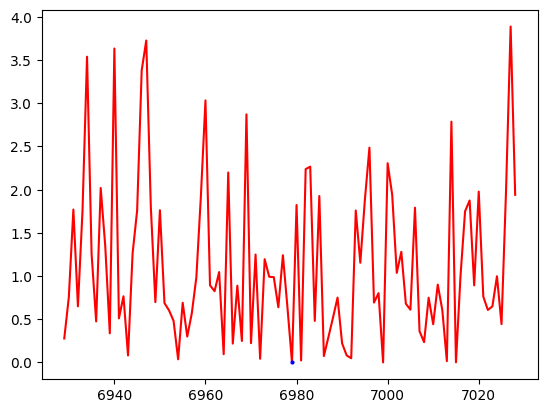

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_3, y_3 , n_epochs =50 ,loss_func = 'Huber',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 5.606633380476561 with index is 413 and best theta is [[-0.21631187]
 [ 1.54703799]
 [-0.31189456]
 [ 0.36376715]]


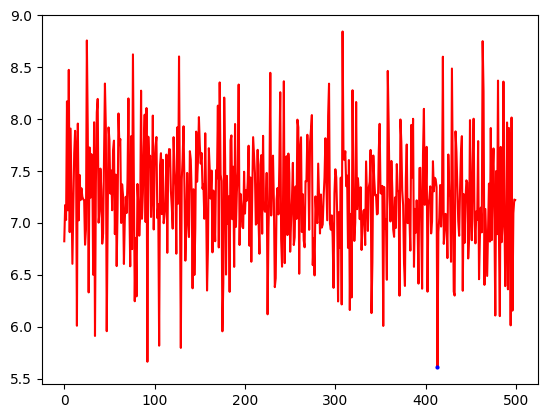

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_1, y_1 , n_epochs =50, loss_func = 'Huber' ,learning_rate =0.001 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 5.066651962935759 with index is 422 and best theta is [[ 2.61115591]
 [-0.18765814]
 [-0.44256683]
 [-0.67322034]]


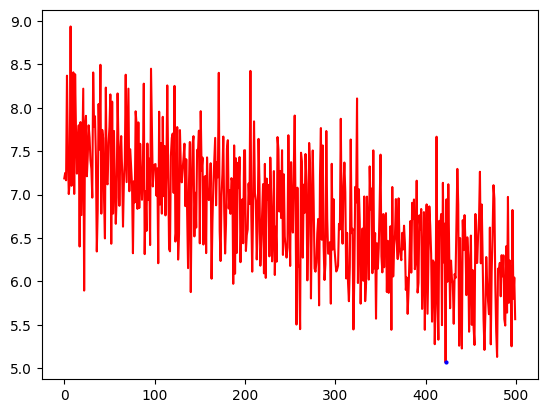

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_2, y_2 , n_epochs =50 ,loss_func = 'Huber',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 5.5901662736388715 with index is 371 and best theta is [[ 0.29793058]
 [ 1.25733642]
 [-0.26112926]
 [ 0.18193559]]


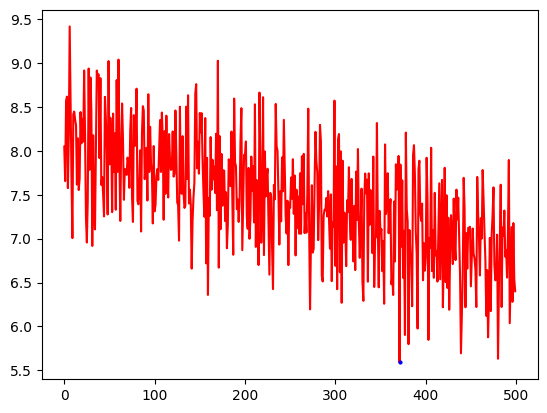

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_3, y_3 , n_epochs =50 ,loss_func = 'Huber',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 4.624778948975113 with index is 499 and best theta is [[ 0.93793058]
 [ 1.42958873]
 [-0.35547141]
 [ 0.10319287]]


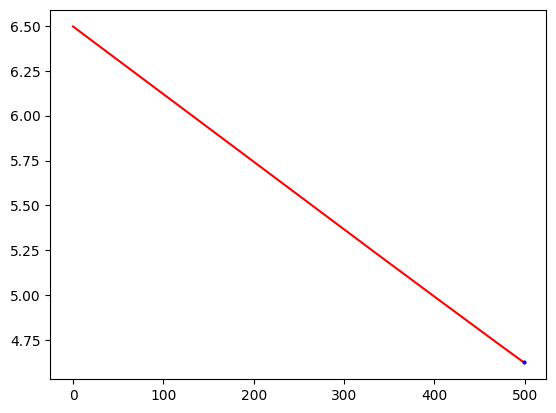

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_1 , y_1 , loss_func = 'Huber',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 5.656654324596714 with index is 499 and best theta is [[ 0.93793058]
 [ 1.42958873]
 [-0.35547141]
 [ 0.10319287]]


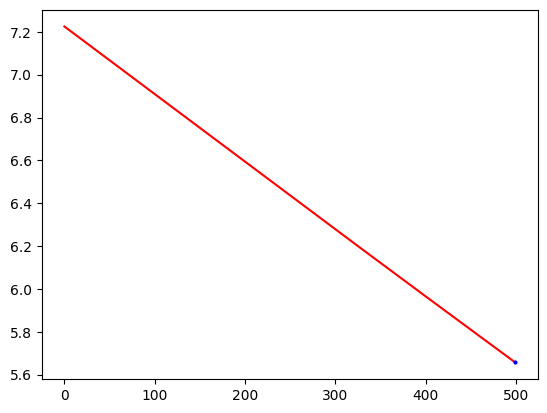

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_2 , y_2 , loss_func = 'Huber',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 6.722130634135295 with index is 499 and best theta is [[ 0.93793058]
 [ 1.42958873]
 [-0.35547141]
 [ 0.10319287]]


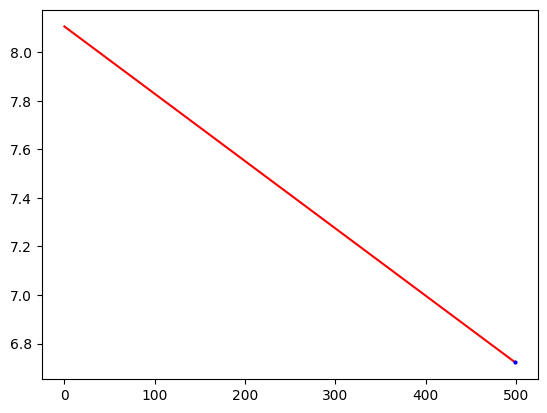

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_3 , y_3 , loss_func = 'Huber',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

##MAE loss

best loss is 7.225445669334363e-06 with index is 7048 and best theta is [[ 6.07652057]
 [13.57765998]
 [ 4.31820939]
 [ 1.15651036]]


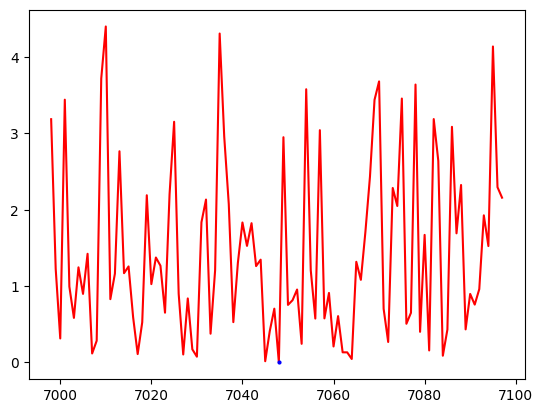

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_1, y_1 , loss_func = 'MAE',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 0.00040914288787519126 with index is 7812 and best theta is [[ 8.0657284 ]
 [13.60957487]
 [ 1.89447999]
 [ 2.04166948]]


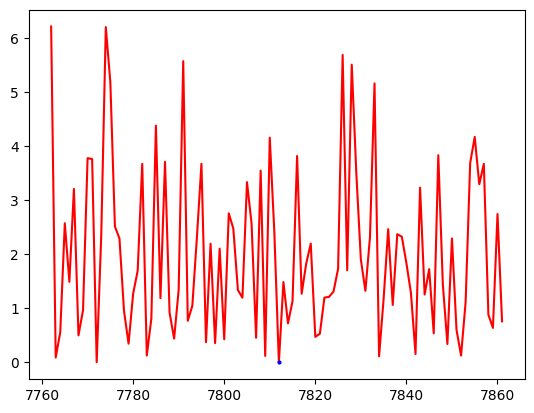

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_2, y_2 , loss_func = 'MAE',n_epochs =50 ,learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

best loss is 0.00013984611391748558 with index is 3104 and best theta is [[12.36391748]
 [ 8.03525455]
 [-0.69751204]
 [-2.6652024 ]]


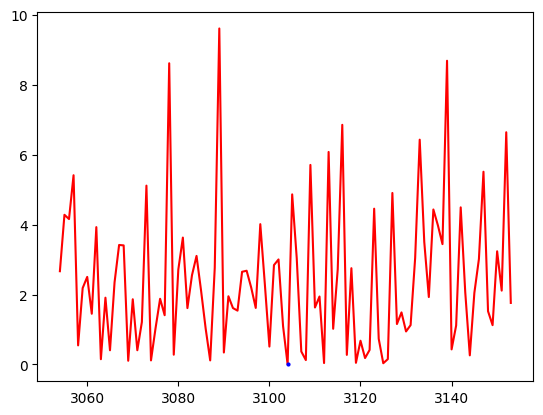

In [ ]:
sgd_theta , losses = stochastic_gradient_descent(X_3, y_3 , n_epochs =50 ,loss_func = 'MAE',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]

print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

x_axis = list(range(index_best_loss-50, index_best_loss+50))
plt.plot(x_axis, losses[index_best_loss-50:index_best_loss+50], color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 10.497173643825045 with index is 428 and best theta is [[ 3.03039596]
 [-0.25304475]
 [-1.35830747]
 [-1.91232195]]


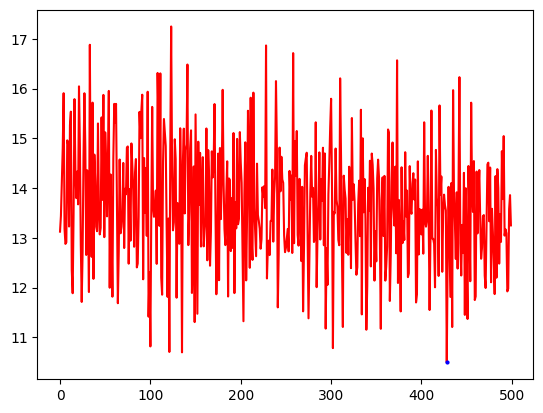

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_1, y_1 , n_epochs =50, loss_func = 'MAE' ,learning_rate =0.001 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 6.570750059526047 with index is 483 and best theta is [[5.14022981]
 [2.51959924]
 [1.21028434]
 [0.0328201 ]]


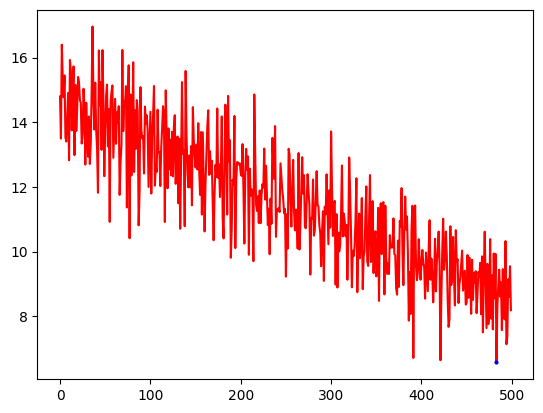

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_2, y_2 , n_epochs =50 ,loss_func = 'MAE',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 5.716662271929307 with index is 452 and best theta is [[ 5.75618266]
 [ 1.20127748]
 [-0.88101094]
 [-1.79697735]]


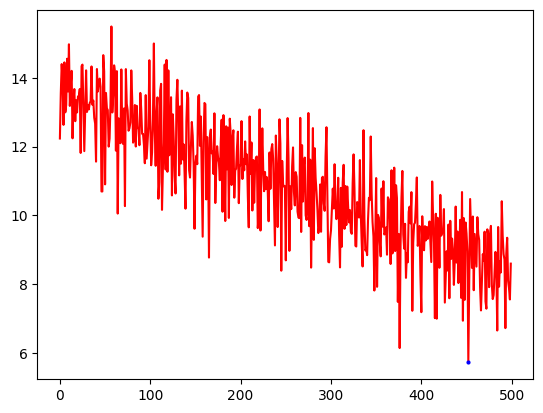

In [ ]:
sgd_theta , losses = mini_batch_gradient_descent(X_3, y_3 , n_epochs =50 ,loss_func = 'MAE',learning_rate =0.01 )
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 10.035854828974507 with index is 499 and best theta is [[ 6.18418266]
 [ 1.33648127]
 [-0.94344565]
 [-1.84839992]]


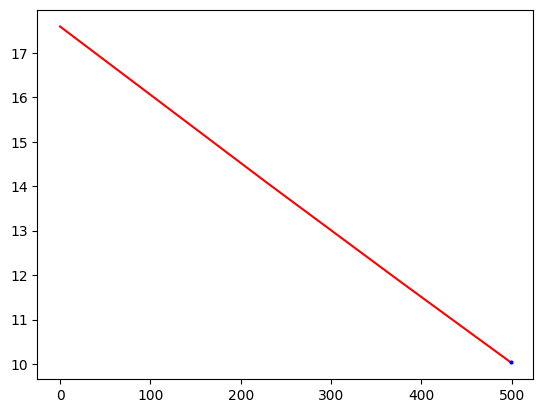

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_1 , y_1 , loss_func = 'MAE',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 8.662686148573043 with index is 499 and best theta is [[ 6.18418266]
 [ 1.33648127]
 [-0.94344565]
 [-1.84839992]]


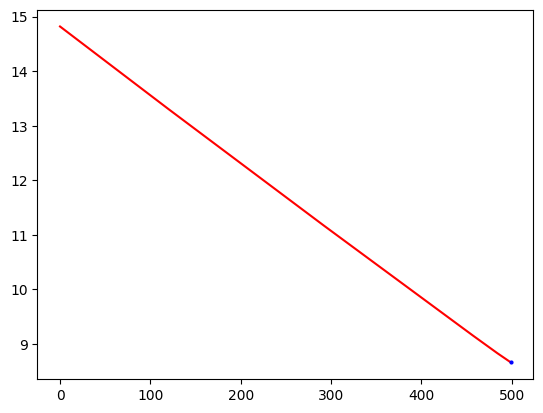

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_2 , y_2 , loss_func = 'MAE',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

500
best loss is 9.779716856118782 with index is 499 and best theta is [[ 6.18418266]
 [ 1.33648127]
 [-0.94344565]
 [-1.84839992]]


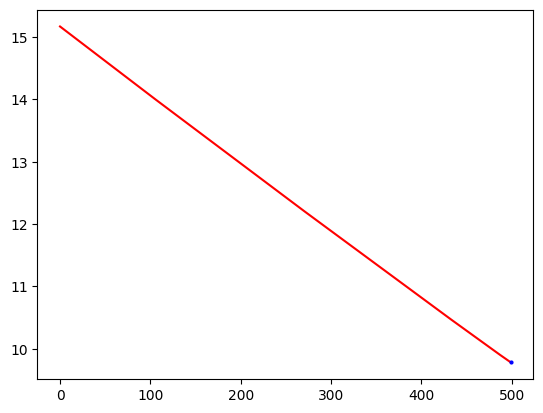

In [ ]:
bgd_thetas, losses = batch_gradient_descent ( X_3 , y_3 , loss_func = 'MAE',n_epochs =500 , learning_rate=0.01)
best_loss = min(losses)
index_best_loss = losses.index(min(losses))
best_theta = sgd_theta[losses.index(min(losses))]
print(len(losses))
print(f'best loss is {best_loss} with index is {index_best_loss} and best theta is {best_theta}')

plt.plot(losses, color ="r")
plt.plot(index_best_loss,best_loss,'bo', markersize=2, label='best loss')
plt.show()

##Normal Equation